In [3]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
#data

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [5]:
#activation function

def sigmoid(x):
    return 1/(1 + np.exp(-x))
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

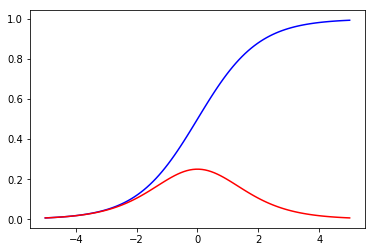

In [10]:
x = np.linspace(-5,5,100)
plt.plot(x, sigmoid(x), c="b")
fig = plt.plot(x, sigmoid_p(x), c="r")

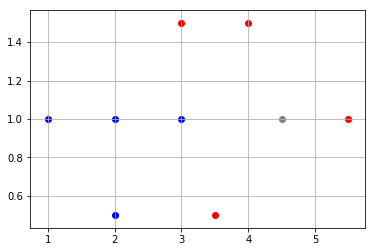

In [7]:
#scattter plot

def vis_data():
    plt.grid()
    
    for i in range(len(data)):
        c="r"
        if data[i][2] == 0:
            c="b"
        plt.scatter([data[i][0]], [data[i][1]], c=c)
    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c="gray")
vis_data()

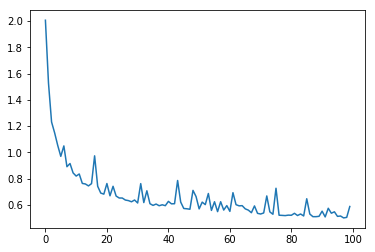

In [14]:
# train

def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()

fig = plt.plot(costs)     

In [17]:
#predict what the mystery flower is

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)
print(pred)
if pred > 0.5:
    print("Red flower")
elif pred == 0.5:
    print("Not sure")
else:
    print("Blue flower") 

0.97686520817
Red flower


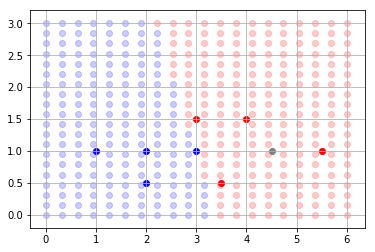

In [18]:
# to check the netwroks prediction in the x-y plane

for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
vis_data()